# Bayesian Data Analysis for RQ1 - H2

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import arviz as az
import glob
import seaborn as sns

csv_files = glob.glob('RawStudyData/timestamps/csv/*.csv')

# Concatenate all CSV files into a single dataframe
df = pd.concat((pd.read_csv(f) for f in csv_files), ignore_index=True)

df['Total Number of Changes'] = df['Number of Changes to Model'] + df['Number of Changes to Inference']
df['Total Percent of Time spend in Inference'] = df['Inference Count'] * df['Mean Inference Time'] / df['Total Task Time']

df

,name,Task,order,Inference Count,Cancelled Inference Count,Mean Inference Time,Median Inference Time,Setup Issue Count,Total Setup Issue Duration,Removed Event Count,...,Fully Solved (seconds),Total Task Time,First Issue Detected,First Issue Solved,Second Issue Detected,Second Issue Solved,Third Issue Detected,Third Issue Solved,Total Number of Changes,Total Percent of Time spend in Inference
0,Rimouski,A,1,2,0,69.76,69.76,0,0.00,0,...,584.626,919.36,NaN,585.0,NaN,NaN,NaN,NaN,2,0.151758
1,Rimouski,C,2,5,1,127.51,118.67,1,79.64,0,...,575.515,1795.37,48.0,195.0,161.0,217.0,NaN,576.0,4,0.355108
2,Rimouski,B,3,4,2,251.00,268.89,2,255.75,0,...,NaN,1751.51,292.0,169.0,NaN,330.0,NaN,NaN,5,0.573220
3,Montreal,A,1,4,1,60.70,57.80,1,33.39,0,...,985.366,1763.29,NaN,985.0,NaN,NaN,NaN,NaN,5,0.137697
4,Montreal,B,2,3,1,139.93,147.53,0,0.00,0,...,NaN,796.12,524.0,528.0,539.0,778.0,NaN,NaN,2,0.527295
5,Montreal,C,3,8,6,183.46,197.81,0,0.00,0,...,NaN,1958.24,406.0,421.0,463.0,679.0,664.0,NaN,4,0.749489
6,Burnaby,C,1,2,1,218.22,218.22,0,0.00,0,...,NaN,1884.59,NaN,NaN,NaN,NaN,NaN,NaN,1,0.231584
7,Burnaby,B,2,6,1,200.52,216.92,1,201.56,0,...,1479.351,1833.28,85.0,109.0,304.0,432.0,1376.0,1479.0,5,0.656266
8,Burnaby,A,3,5,0,164.33,102.97,0,0.00,0,...,279.703,1446.64,186.0,280.0,NaN,NaN,NaN,NaN,7,0.567971
9,Nelson,A,1,2,0,92.74,92.74,1,101.72,0,...,1321.828,1396.19,1079.0,1322.0,NaN,NaN,NaN,NaN,1,0.132847


In [22]:
# Encode categorical variables
df2 = df.copy()
df2['participant_idx'] = df['name'].astype('category').cat.codes
df2['task_idx'] = df['Task'].map({'A': 0, 'B': 1, 'C': 2})
df2['order_idx'] = df['order'] - 1  # Assuming order is 1-based
df2['tool'] = df['order'] != 1
df2['n_issues'] = np.where(df2['Task'] == 'A', 1, 3)

# Calculate number of solved issues from percentage
df2['n_solved'] = (df2['Percentage of Solved Issues'] / 100 * df2['n_issues']).round().astype(int)

# Define coordinates
coords = {
    #'participant': df2['participant_idx'].unique(),
    'participant': df2['name'].unique(),
    'task': ['A', 'B', 'C']
}

df = df2
df

,name,Task,order,Inference Count,Cancelled Inference Count,Mean Inference Time,Median Inference Time,Setup Issue Count,Total Setup Issue Duration,Removed Event Count,...,Third Issue Detected,Third Issue Solved,Total Number of Changes,Total Percent of Time spend in Inference,participant_idx,task_idx,order_idx,tool,n_issues,n_solved
0,Rimouski,A,1,2,0,69.76,69.76,0,0.00,0,...,NaN,NaN,2,0.151758,11,0,0,False,1,1
1,Rimouski,C,2,5,1,127.51,118.67,1,79.64,0,...,NaN,576.0,4,0.355108,11,2,1,True,3,3
2,Rimouski,B,3,4,2,251.00,268.89,2,255.75,0,...,NaN,NaN,5,0.573220,11,1,2,True,3,2
3,Montreal,A,1,4,1,60.70,57.80,1,33.39,0,...,NaN,NaN,5,0.137697,8,0,0,False,1,1
4,Montreal,B,2,3,1,139.93,147.53,0,0.00,0,...,NaN,NaN,2,0.527295,8,1,1,True,3,2
5,Montreal,C,3,8,6,183.46,197.81,0,0.00,0,...,664.0,NaN,4,0.749489,8,2,2,True,3,2
6,Burnaby,C,1,2,1,218.22,218.22,0,0.00,0,...,NaN,NaN,1,0.231584,2,2,0,False,3,0
7,Burnaby,B,2,6,1,200.52,216.92,1,201.56,0,...,1376.0,1479.0,5,0.656266,2,1,1,True,3,3
8,Burnaby,A,3,5,0,164.33,102.97,0,0.00,0,...,NaN,NaN,7,0.567971,2,0,2,True,1,1
9,Nelson,A,1,2,0,92.74,92.74,1,101.72,0,...,NaN,NaN,1,0.132847,10,0,0,False,1,1


In [23]:
import pymc as pm
import pytensor.tensor as pt
rng = np.random.default_rng(42)

with pm.Model(coords=coords) as model:
	nu_participant = pm.Uniform('nu_participant', lower=1, upper=10)
	mu_participant_skill = pm.Normal('mu_participant_skill', mu=0, sigma=1)
	sigma_participant_skill = pm.HalfNormal('sigma_participant_skill', sigma=1)
	participant_skill_raw = pm.StudentT('participant_skill_raw',nu=nu_participant, mu=0, sigma=1, dims='participant')
	participant_skill = pm.Deterministic('participant_skill', mu_participant_skill + sigma_participant_skill * participant_skill_raw, dims='participant')

	mu_task_difficulty = pm.Beta('mu_task_difficulty', alpha=4, beta=2)
	sigma_task_difficulty = pm.HalfNormal('sigma_task_difficulty', sigma=1)
	task_effect_raw = pm.Normal('task_effect_raw', mu=0, sigma=1, dims='task')
	task_effect = pm.Deterministic('task_effect', mu_task_difficulty + sigma_task_difficulty * task_effect_raw, dims='task')

	tool_effect = pm.Normal('tool_effect', 0.0, 1.0)

	learning_effect = pm.Normal('learning_effect', 0.0, 1.0)

	logit_p = (
        tool_effect * df['tool'].values +
		learning_effect * np.where(df['order_idx'].values <2, 0, 1) +
        participant_skill[df['participant_idx'].values] -
        task_effect[df['task_idx'].values] 
    )

	p = pm.Deterministic('p', pm.math.sigmoid(logit_p))

	y_obs = pm.Binomial('y_obs', n=df['n_issues'].values, p=p, observed=df['n_solved'].values)

	trace = pm.sample_prior_predictive(draws=50)
	trace.extend(pm.sample(4000, tune=3000, target_accept=0.95, return_inferencedata=True, random_seed=rng))

Sampling: [learning_effect, mu_participant_skill, mu_task_difficulty, nu_participant, participant_skill_raw, sigma_participant_skill, sigma_task_difficulty, task_effect_raw, tool_effect, y_obs]
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_participant, mu_participant_skill, sigma_participant_skill, participant_skill_raw, mu_task_difficulty, sigma_task_difficulty, task_effect_raw, tool_effect, learning_effect]


Output()

Sampling 4 chains for 3_000 tune and 4_000 draw iterations (12_000 + 16_000 draws total) took 20 seconds.


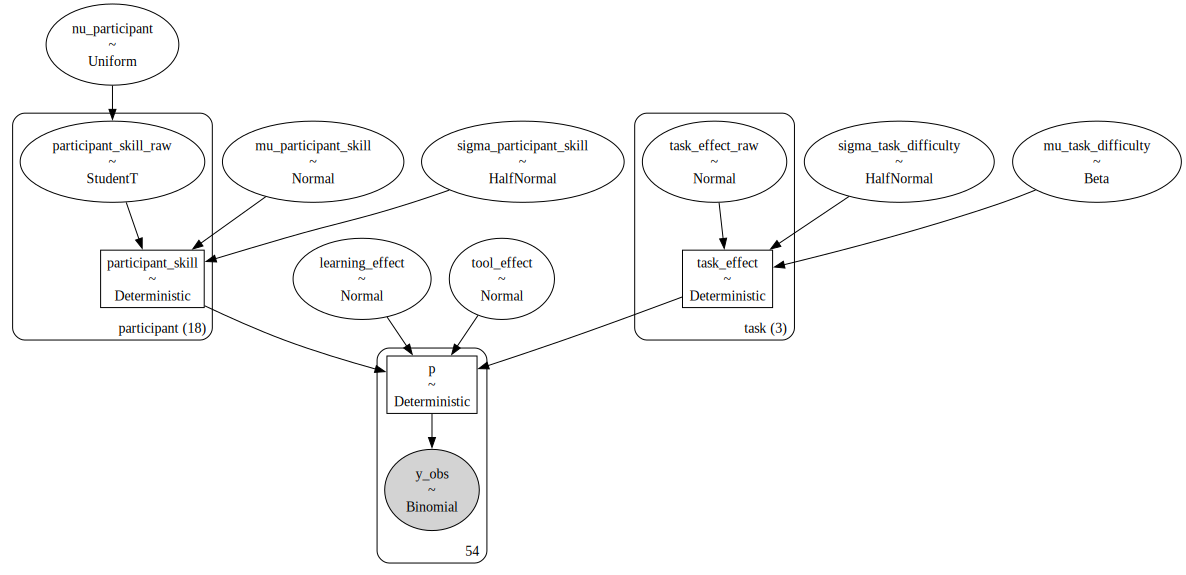

In [24]:
model.to_graphviz()

In [25]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_participant_skill,-0.350,0.626,-1.529,0.818,0.006,0.005,9827.0,10918.0,1.0
participant_skill_raw[Rimouski],-0.326,1.340,-2.628,1.887,0.012,0.064,17156.0,5418.0,1.0
participant_skill_raw[Montreal],0.171,1.152,-1.880,2.293,0.010,0.030,18088.0,6707.0,1.0
participant_skill_raw[Burnaby],0.272,1.267,-1.870,2.416,0.015,0.061,16557.0,5701.0,1.0
participant_skill_raw[Nelson],0.260,1.204,-1.814,2.508,0.011,0.037,17414.0,6104.0,1.0
...,...,...,...,...,...,...,...,...,...
p[49],0.854,0.124,0.626,0.997,0.001,0.002,8766.0,11598.0,1.0
p[50],0.624,0.153,0.325,0.879,0.001,0.001,11808.0,12233.0,1.0
p[51],0.466,0.184,0.139,0.802,0.002,0.001,11135.0,11137.0,1.0
p[52],0.670,0.127,0.429,0.888,0.001,0.001,14664.0,13361.0,1.0


In [26]:
az.summary(trace, var_names=["mu_task_difficulty", "sigma_task_difficulty", "mu_participant_skill", "sigma_participant_skill", "learning_effect", "tool_effect"], hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_task_difficulty,0.680,0.174,0.349,0.978,0.001,0.001,19089.0,10307.0,1.0
sigma_task_difficulty,1.069,0.497,0.146,2.072,0.005,0.004,7189.0,5052.0,1.0
mu_participant_skill,-0.350,0.626,-1.563,0.885,0.006,0.005,9827.0,10918.0,1.0
sigma_participant_skill,0.489,0.303,0.001,1.046,0.007,0.003,1831.0,4149.0,1.0
learning_effect,0.333,0.485,-0.617,1.282,0.004,0.004,14121.0,11632.0,1.0
tool_effect,2.529,0.488,1.540,3.458,0.004,0.004,15810.0,12380.0,1.0


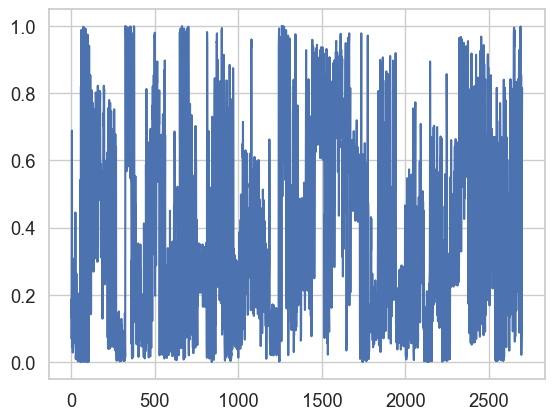

In [27]:
plt.plot(trace.prior["p"].values.flatten())

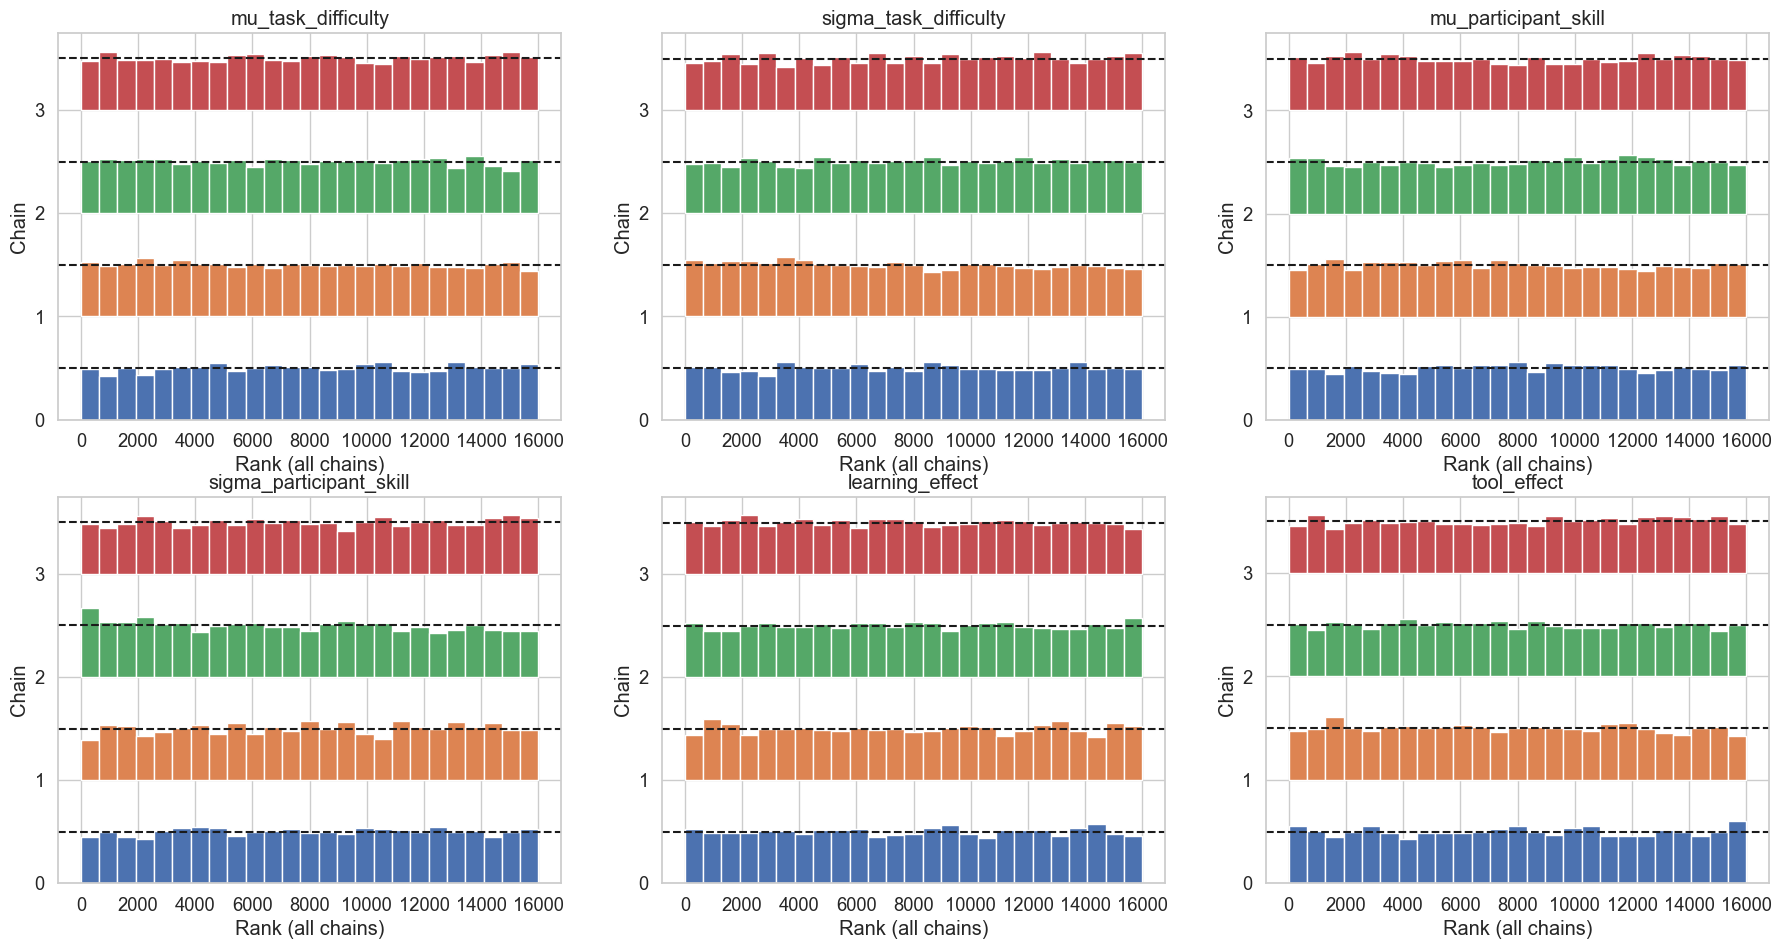

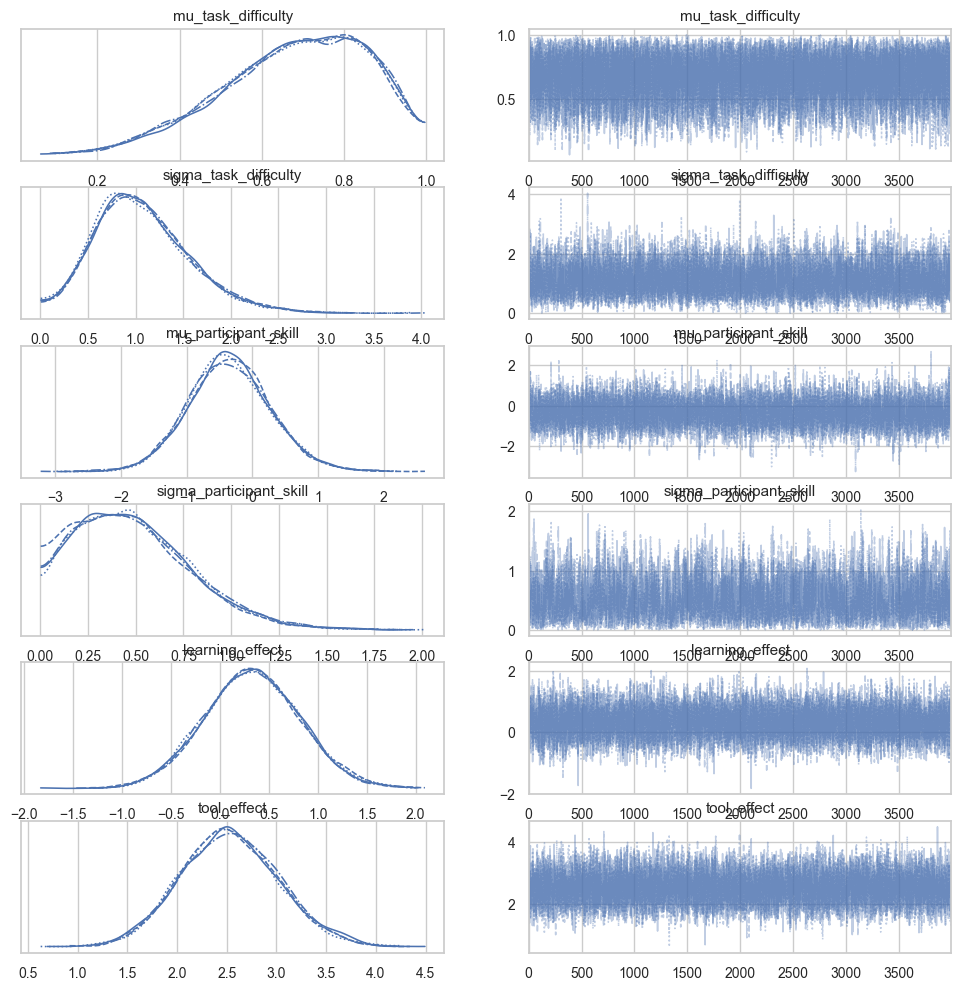

In [28]:
var_names = ["mu_task_difficulty", "sigma_task_difficulty", "mu_participant_skill", "sigma_participant_skill", "learning_effect", "tool_effect"]

az.plot_rank(trace, var_names=var_names);
az.plot_trace(trace, var_names=var_names);

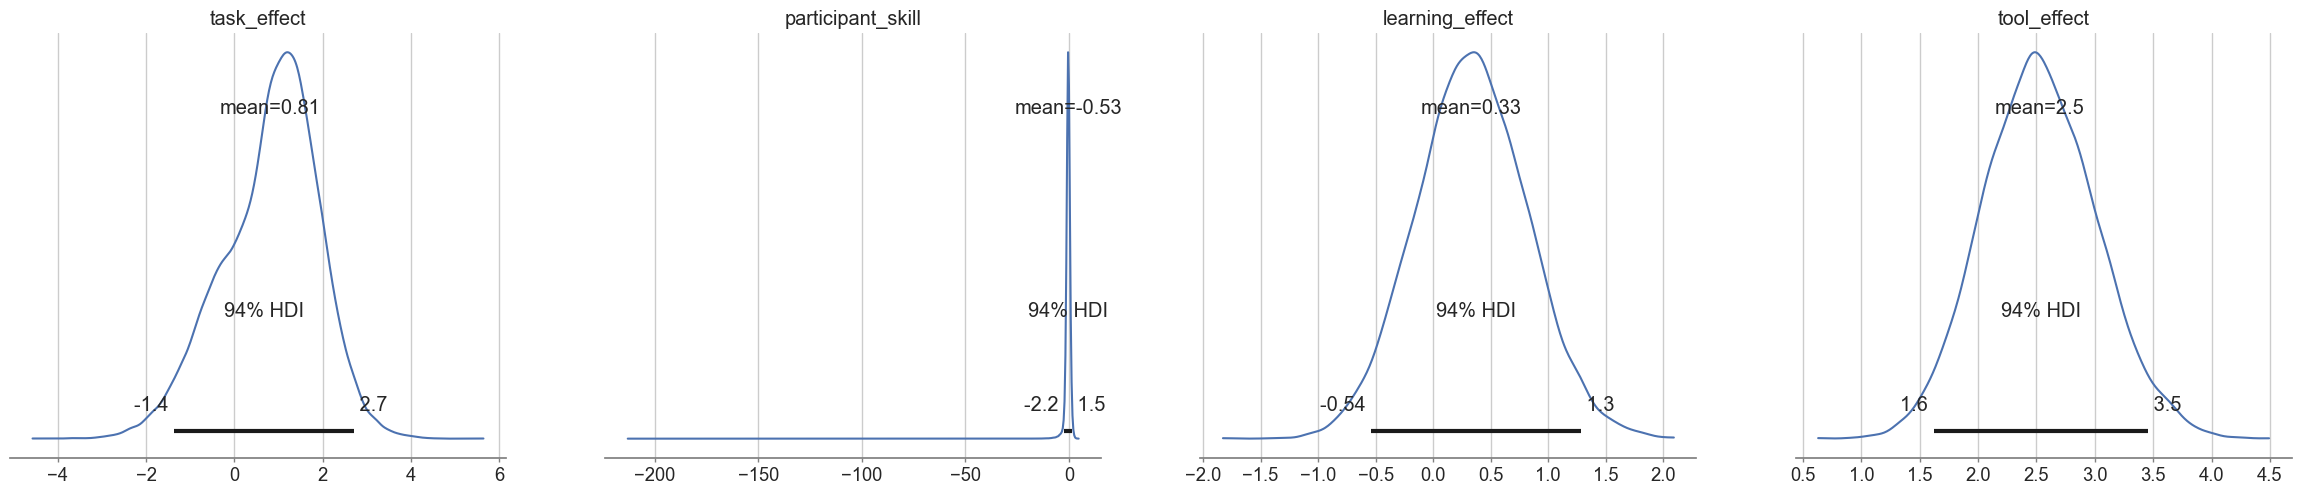

In [29]:
az.plot_posterior(
	trace,
	var_names=["task_effect", "participant_skill", "learning_effect", "tool_effect"],
	combine_dims={"participant", "task"}
);

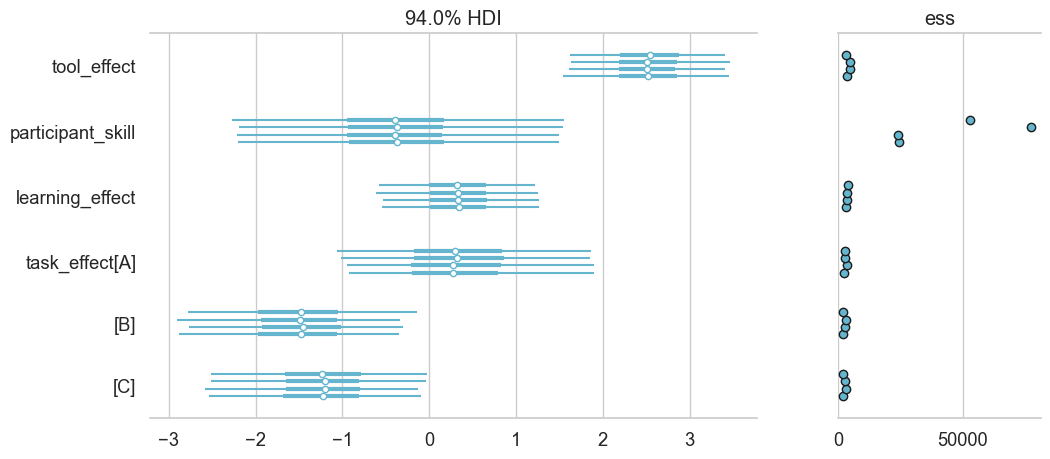

In [ ]:
# For visual interpretability we flip the sign of task effect here, because it is the only negative (subtracted) effect in the model. 
flip_task_sign = trace.copy()
flip_task_sign.posterior['task_effect'] = -flip_task_sign.posterior['task_effect']

az.plot_forest(flip_task_sign, 
	var_names=["tool_effect", "participant_skill", "learning_effect", "task_effect"],
	figsize=(11.5, 5),
    colors="C9",
	combine_dims={"participant"},
    ess=True
);

In [31]:
with model:
    # Posterior predictive checks
    ppc = pm.sample_posterior_predictive(trace, var_names=["y_obs"], extend_inferencedata=True, random_seed=42)

Sampling: [y_obs]


Output()

/opt/miniconda3/envs/ppldebugger/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/miniconda3/envs/ppldebugger/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


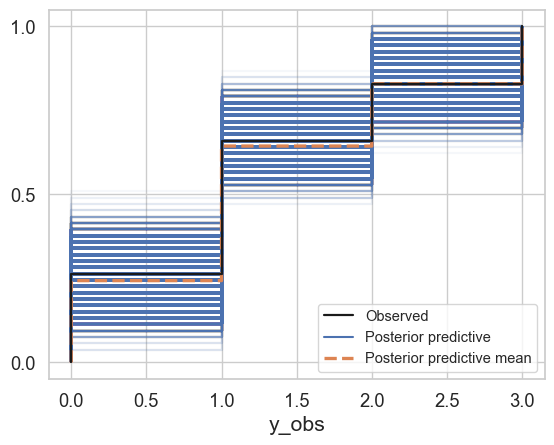

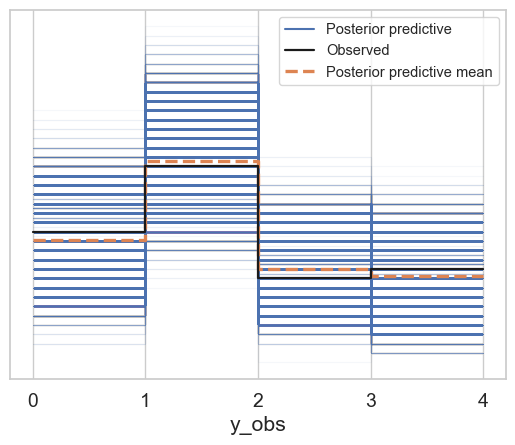

In [32]:
az.plot_ppc(trace, alpha=0.05, kind="cumulative", textsize=14);
az.plot_ppc(trace, alpha=0.05, textsize=14);

In [33]:
new_coords = {
	'task': ['A', 'B', 'C']
}

In [34]:
with pm.Model(coords=new_coords) as prediction_model:
	nu_participant = pm.Uniform('nu_participant', lower=1, upper=10)
	mu_participant_skill = pm.Normal('mu_participant_skill', mu=0, sigma=1)
	sigma_participant_skill = pm.HalfNormal('sigma_participant_skill', sigma=1)
	participant_skill_raw = pm.StudentT('participant_skill_new_raw',nu=nu_participant, mu=0, sigma=1)
	participant_skill = pm.Deterministic('participant_skill_new', mu_participant_skill + sigma_participant_skill * participant_skill_raw)

	mu_task_difficulty = pm.Beta('mu_task_difficulty', alpha=4, beta=2)
	sigma_task_difficulty = pm.HalfNormal('sigma_task_difficulty', sigma=1)
	task_effect_raw = pm.Normal('task_effect_raw', mu=0, sigma=1, dims='task')
	task_effect = pm.Deterministic('task_effect', mu_task_difficulty + sigma_task_difficulty * task_effect_raw, dims='task')

	tool_effect = pm.Normal('tool_effect', 0.0, 1.0)

	logit_p = (
		participant_skill - task_effect 
    )

	p_no_tool = pm.Deterministic('p_no_tool', pm.math.sigmoid(logit_p), dims='task')
	p_tool = pm.Deterministic('p_tool', pm.math.sigmoid(logit_p + tool_effect), dims='task')

	total_tool_effect = pm.Deterministic('total_tool_effect', p_tool - p_no_tool, dims='task')
	total_tool_scale = pm.Deterministic('total_tool_scale', p_tool / p_no_tool, dims='task')

	no_tool_obs = pm.Binomial('no_tool_obs', n=np.array([1, 3, 3]), p=p_no_tool, dims='task')
	tool_obs = pm.Binomial('tool_obs', n=np.array([1, 3, 3]), p=p_tool, dims='task')

	pp_t = pm.sample_posterior_predictive(
        trace, 
        var_names=["no_tool_obs", "tool_obs", "p_no_tool", "p_tool", "total_tool_effect", "total_tool_scale"], 
        predictions=True, 
    )

Sampling: [no_tool_obs, participant_skill_new_raw, tool_obs]


Output()

In [35]:
pp_t.predictions["p_no_tool"].sel(task='A').values.flatten()

array([0.30262911, 0.29986808, 0.38808692, ..., 0.7355315 , 0.37322582,
       0.00101163], shape=(16000,))

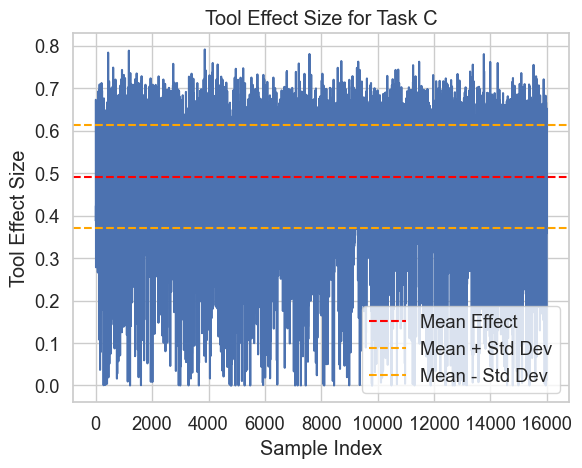

In [36]:
selected_task = 'C'
tool_effect_size = pp_t.predictions["p_tool"].sel(task=selected_task).values.flatten() - pp_t.predictions["p_no_tool"].sel(task=selected_task).values.flatten()

plt.plot(tool_effect_size)
m, std = tool_effect_size.mean(), tool_effect_size.std()
plt.axhline(m, color='red', linestyle='--', label='Mean Effect')
plt.axhline(m + std, color='orange', linestyle='--', label='Mean + Std Dev')
plt.axhline(m - std, color='orange', linestyle='--', label='Mean - Std Dev')
plt.title(f'Tool Effect Size for Task {selected_task}')
plt.xlabel('Sample Index')
plt.ylabel('Tool Effect Size')
plt.legend()
plt.show()

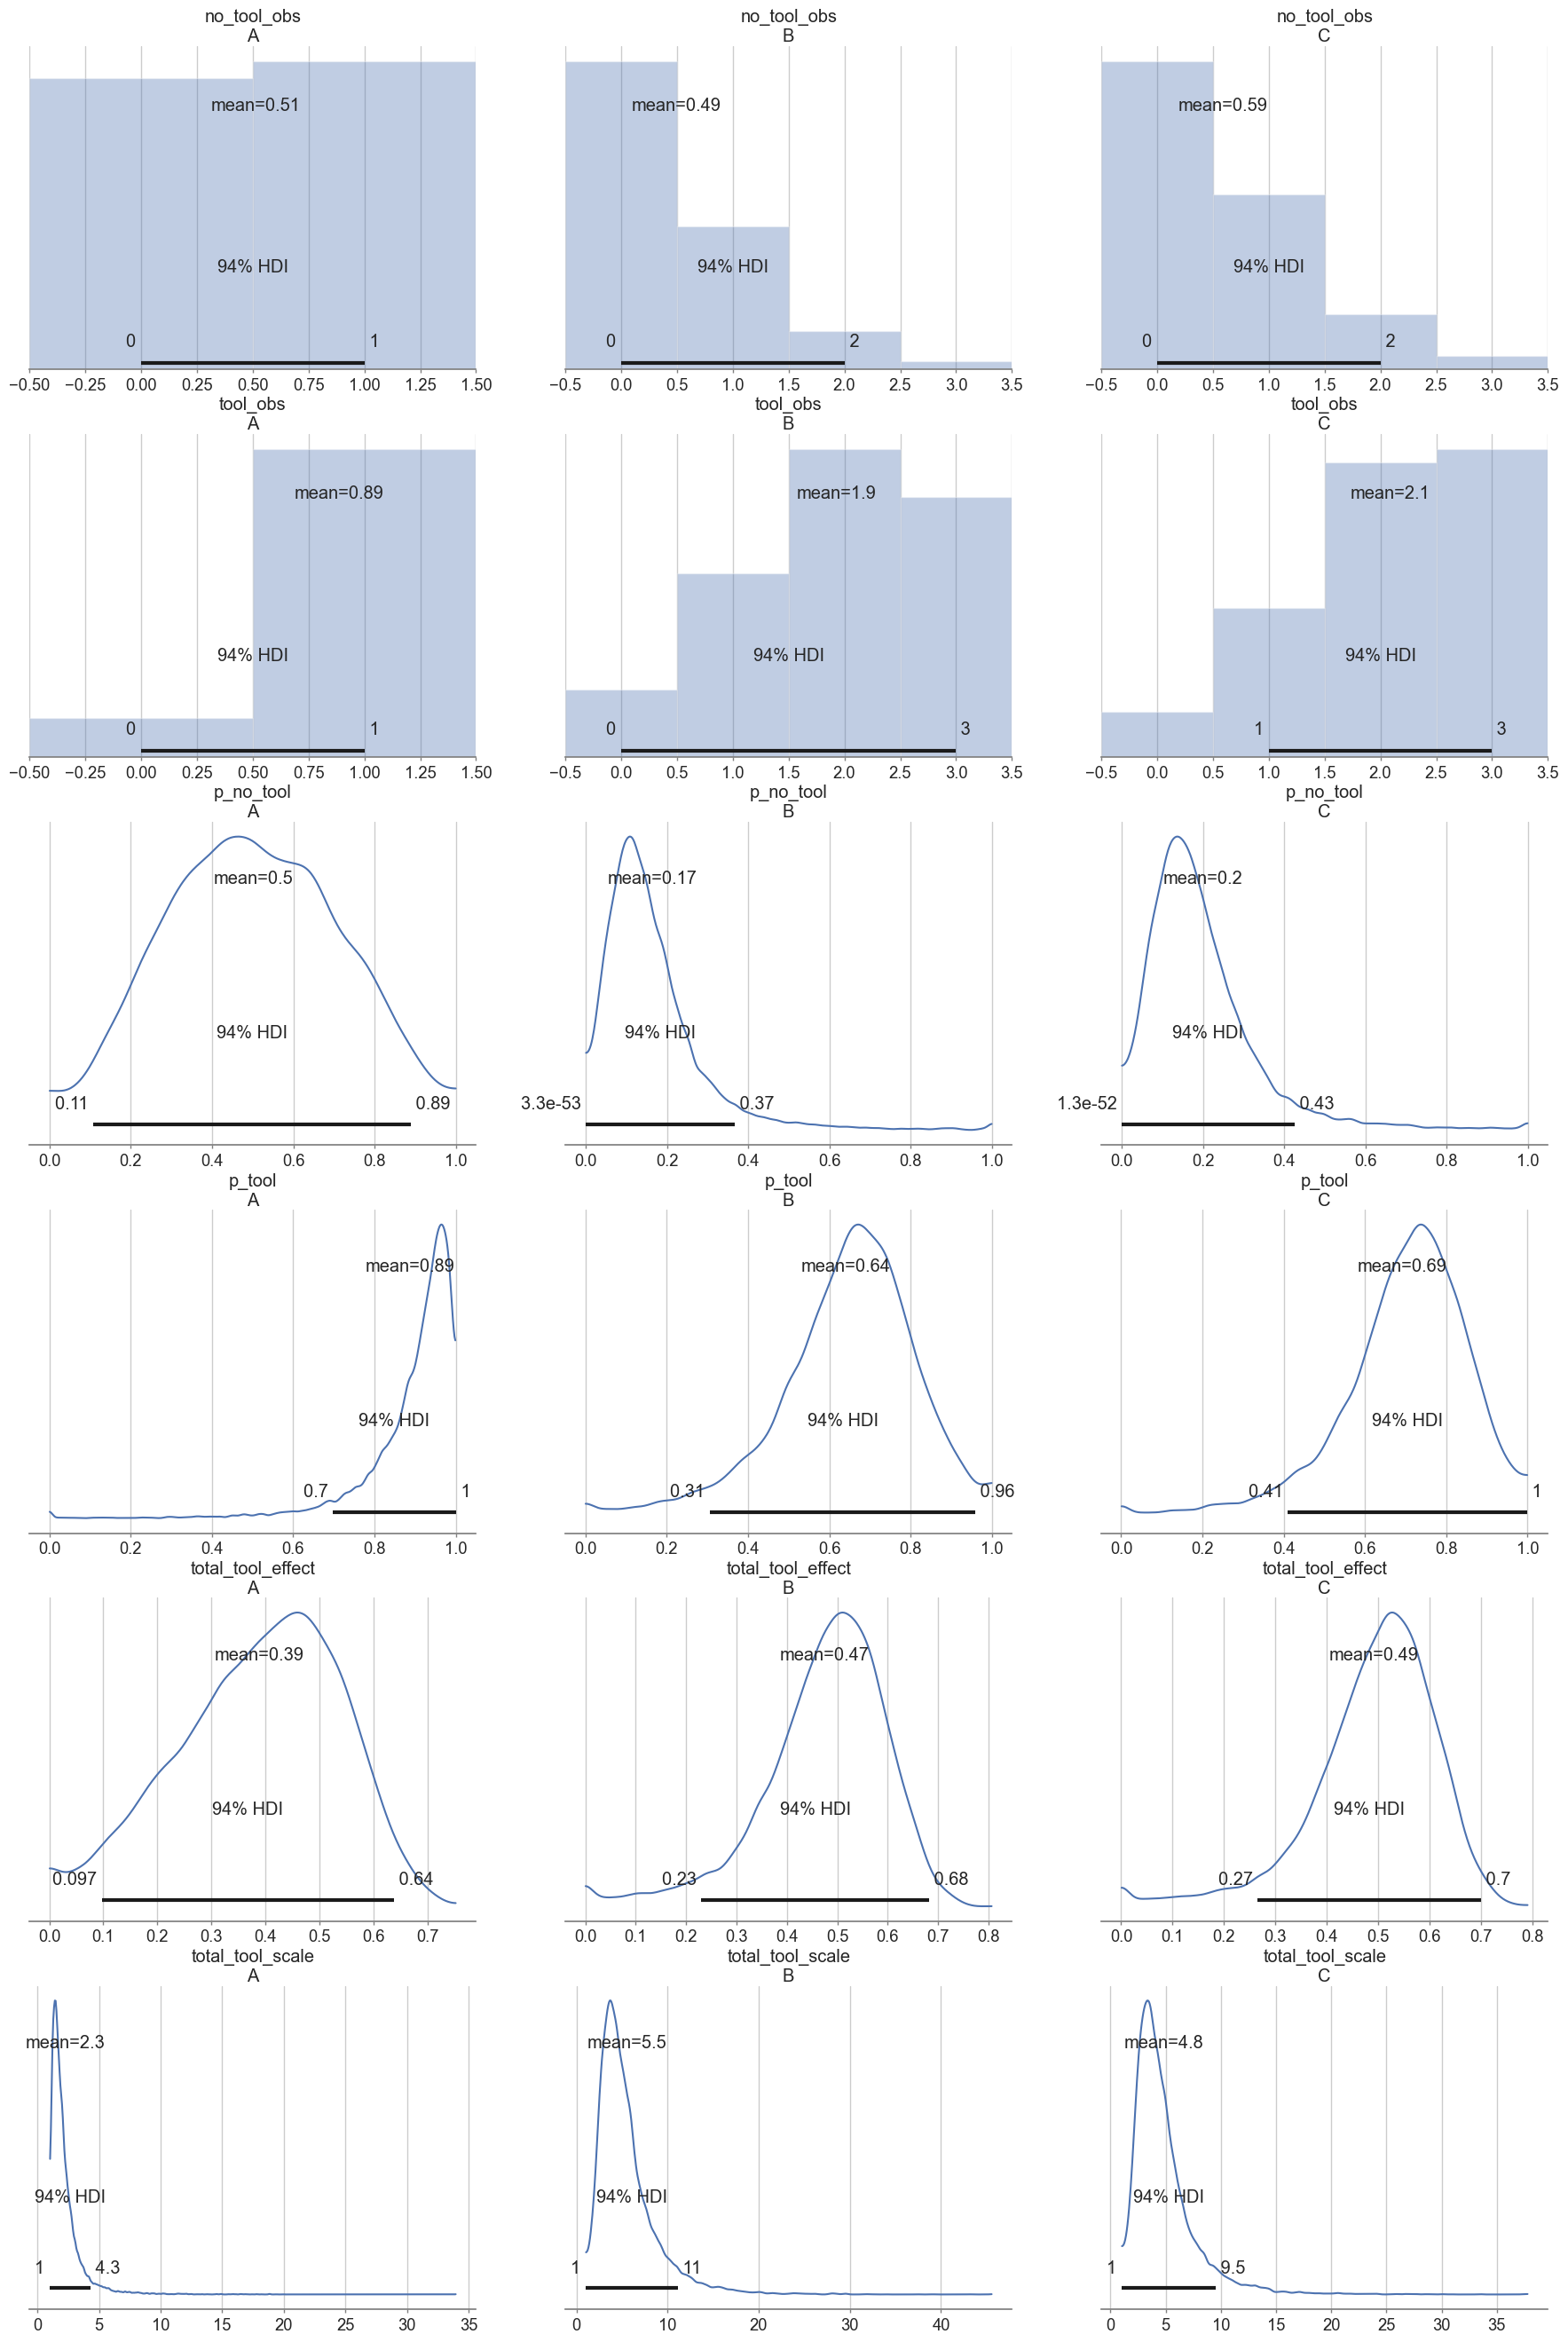

In [37]:
az.plot_posterior(pp_t, group="predictions");

In [38]:
taskTest = 'B'
(pp_t.predictions['no_tool_obs'].sel(task=taskTest).values.flatten() >= 1).mean()

np.float64(0.3813125)

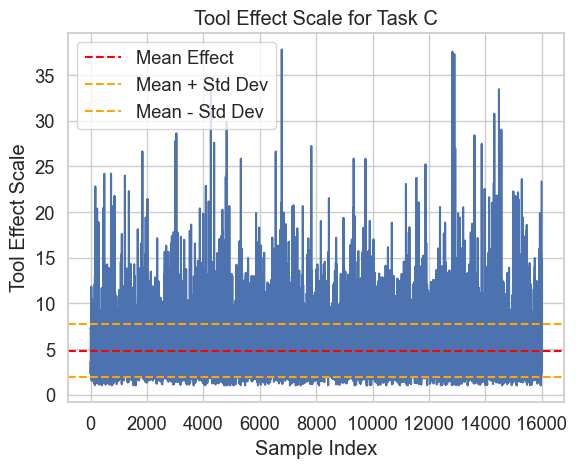

(np.float64(4.80536610999069),
 np.float64(1.9298513108286657),
 np.float64(7.680880909152714))

In [39]:
taskTest = 'C'
total_effect_scale = pp_t.predictions['p_tool'].sel(task=taskTest).values.flatten() / pp_t.predictions['p_no_tool'].sel(task=taskTest).values.flatten()

plt.plot(total_effect_scale)
m, std = total_effect_scale.mean(), total_effect_scale.std()
plt.axhline(m, color='red', linestyle='--', label='Mean Effect')
plt.axhline(m + std, color='orange', linestyle='--', label='Mean + Std Dev')
plt.axhline(m - std, color='orange', linestyle='--', label='Mean - Std Dev')
plt.title(f'Tool Effect Scale for Task {taskTest}')
plt.xlabel('Sample Index')
plt.ylabel('Tool Effect Scale')
plt.legend()
plt.show()

m, m-std, m+std

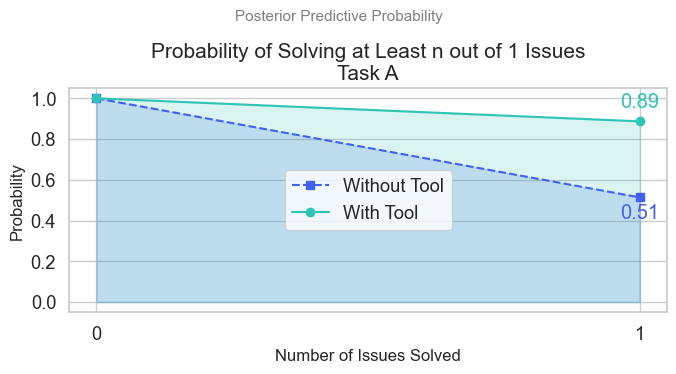

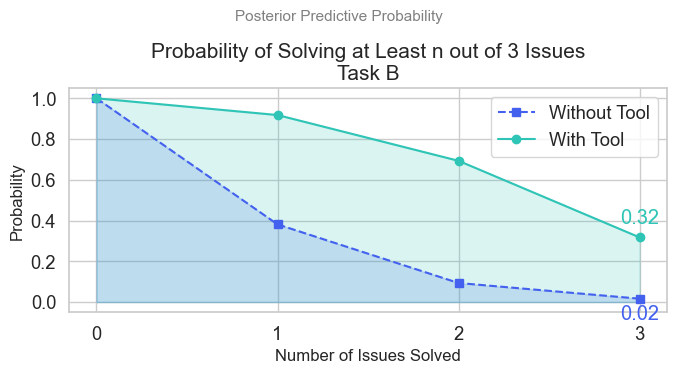

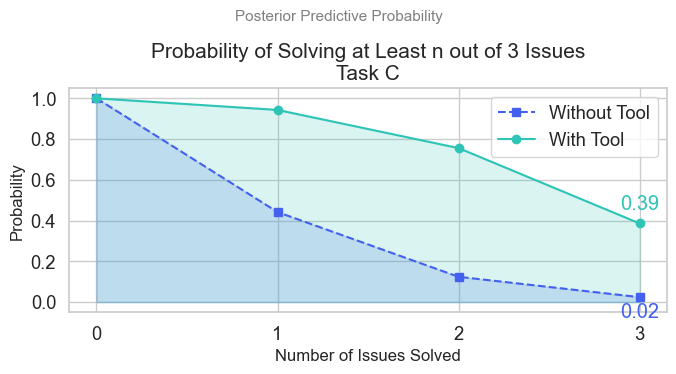

In [40]:
def plot_prob_of_solving_more_than(trace, task, n):
    sns.set_theme(style="whitegrid", font_scale=1.2)
    # Use custom cool colors
    tool_color = "#2ec4b6"      # Teal
    no_tool_color = "#4361ee"   # Purple

    tool_bigger = []
    no_tool_bigger = []
    issues = np.arange(n + 1)
    for target in range(n + 1):
        tool_bigger.append((trace.predictions['tool_obs'].sel(task=task).values.flatten() >= target).mean())
        no_tool_bigger.append((trace.predictions['no_tool_obs'].sel(task=task).values.flatten() >= target).mean())

    plt.figure(figsize=(7, 4))
    plt.plot(issues, no_tool_bigger, marker='s', linestyle='--', color=no_tool_color, label='Without Tool')
    plt.plot(issues, tool_bigger, marker='o', linestyle='-', color=tool_color, label='With Tool')
    plt.fill_between(issues, no_tool_bigger, alpha=0.18, color=no_tool_color)
    plt.fill_between(issues, tool_bigger, alpha=0.18, color=tool_color)

    plt.annotate(f"{tool_bigger[-1]:.2f}", (issues[-1], tool_bigger[-1]), textcoords="offset points", xytext=(0,10), ha='center', color=tool_color)
    plt.annotate(f"{no_tool_bigger[-1]:.2f}", (issues[-1], no_tool_bigger[-1]), textcoords="offset points", xytext=(0,-15), ha='center', color=no_tool_color)

    plt.title(f"Probability of Solving at Least n out of {n} Issues\nTask {task}", fontsize=15)
    plt.suptitle("Posterior Predictive Probability", fontsize=11, y=0.94, color='gray')
    plt.xlabel('Number of Issues Solved', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.ylim(-0.05, 1.05)
    plt.xticks(issues)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_prob_of_solving_more_than(pp_t, 'A', 1)
plot_prob_of_solving_more_than(pp_t, 'B', 3)
plot_prob_of_solving_more_than(pp_t, 'C', 3)